# ANÁLISIS "LOAN" - Modelo de Clasificación de REGERSIÓN LOGÍSTICA 

- **DESCRIPCIÓN DE LIBRERIAS UTILIZADAS:**

**VARIABLE OBJETIVO / PREDICTORA:** 
“y”, es el target que busca el banco. La variable dará información si el cliente contrata un depósito a largo plazo o no. Objetivo a predecir

Tipo de variable: Categórica Binaria (Bool). Como es binaria, usamos un modelo de clasificación.

**VARIABLES INDEPENDIENTES:**

**VARIABLES CATEGÓRICAS**
 "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"

Categórica Binaria: "default", "housing","loan"

Categórica Nominal: "job", "maritial", "contact", "month", "day_of_week", "poutcome"

Categórica Ordinal: "educataion"

 **VARIABLES NUMÉRICAS**
"age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.indx", ""cons.conf.indx", "euribor3m", "nr.employed"

De las cuales Continuas:Pueden tomar cualquier valor en un rango ----- USAR MIN-MAX SCALING O Z-COSE SCALING

"age", "duration", "emp.var.rate","cons.price.indx", cons.conf.indx", "euribor3m", "nr.employed"

De las cuales Discretas:Toman valores específicos y contable ----- ANALIZADAS PARA IDENTIFICAR OUTLIERS Y SESGO EN LA DISTRIBUCION

"campaign",  "pdays", "precious"

Encontramos varias variables que indican datos económicos que pueden afectar a la toma de decisoines de los clientes a la hora de querer adquirir un depósito a largo plazo o no. Podríamos categorizarlas como variables económicas: ---- analizar la "multicolinealidad" --- que eeeeeees esooo?


### **PASO 0: IMPORTS**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest 

- **DESCRIPCIÓN DEL PROBLEMA**  
    DISMINUCIÓN DE INGRESOS DEL BANCO. ESTE QUIERE OFRECER DEPÓSITOS A LARGO PLAZO PARA RECUPERAR DINERO.
    
    OBJETIVO: Identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo 



- **PROCEDIMIENTOS A SEGUIR:**

- Crear algoritmo de clasificación ?¿?¿?¿?¿ A QUE SE REFIERE ?¿?¿?¿ A un código escrito que se dedica a clasificar datos?¿?¿?¿?

- Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

- EDA

- CONSTRUIR MODELO DE REGRESIÓN LOGÍSTICA

- OPTIMIZAR EL MODELO

### **PASO 1: LECTURA DE CSV**

In [13]:
ds= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS**

In [14]:
ds.shape

(41188, 21)

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

    Conclusión: 
    · No se encuentran valores nulos.
    · Tenemos 10 variables numéricas y 11 de tipo object-string

**EXPLORACIÓN DE DATOS**

* Detectar duplicados y contarlos:

In [16]:
ds.duplicated().sum()

np.int64(12)

* Visualizacióon de duplicados:

In [17]:
ds[ds.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


    Conclusión: tenemos 12 filas duplicadas.

?¿?¿?¿----- NO ESTOY SEGURA DE QUE LOS DUCPLICADOS QUE MUESTRA SEAN DUPLICADOS REALES -----?¿?¿?¿?¿

* Identificar valores nulos:

* Analizar la distribución de las variables numéricas:

* Revisar cantidad e categorías en variables categóricas:

COUNT UNKNOWN:"previous", "default","housing","loan","poutcome"

In [27]:
ds[["previous"]==0].value_counts()


KeyError: False

In [26]:
ds[["previous"]== 0].shape()

KeyError: False

In [ ]:
ds["pdays"].value_counts()["unknown"]
#CHECK RANGE OF DAYS QUE SIRVA PARA EL ANALISIS --- IMPORTANT

KeyError: 'unknown'

**LIMPIEZA DE DATOS IRRELEVANTES**

ELEGIR 
VARIABLES ELIMINADAS: 
VARIABLES ESCOGIDASD PARA EL ANÁLISIS:

    Conclusión:

### **PASO 3: ANÁLISIS DE VARIABLES UNIVARIANTE**

**VARIABLES CATEGÓRICAS**
 "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"


 **VARIABLES NUMÉRICAS**
"age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.indx", ""cons.conf.indx", "euribor3m", "nr.employed"

##### **ANÁLISIS DE VARIABLES UNIVARIANTE**

**GRÁFICO DE VARIABLES CATEGÓRICAS**

* Conteo de freceuncia en variables categóricas: ¿?¿?¿?¿?¿?¿?¿?¿?¿?¿?

In [ ]:
fig, axis = plt.subplots(1,2, figsize = (15, 10))

plot1=sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set(xlabel = " By Neighbourhood Group")

plot3=sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(xlabel = "By Room type")

plt.tight_layout()
plt.grid(True, linestyle = '--')
plt.show()

    Conclusión:

- **GRÁFICO DE VARIABLES NUMÉRICAS**

* Histogramas y Boxplots

In [ ]:
fig, axis = plt.subplots(3, 2, figsize = (13, 10))

sns.boxplot(ax = axis[0, 1], data = total_data, x = "price").set(xlabel = "Variable Predictoria - Price")

sns.boxplot(ax = axis[1, 0], data = total_data, x = "minimum_nights").set(xlabel = "Minimum_nights")

sns.boxplot(ax = axis[1, 1], data = total_data, x = "latitude").set(xlabel = "Latitude")

sns.boxplot(ax = axis[2, 0], data = total_data, x = "longitude").set(xlabel = "Longitude")

sns.boxplot(ax = axis[2, 1], data = total_data, x = "availability_365").set(xlabel = "Availability_365")

plt.tight_layout()

plt.show()

    Conclusión:

- **VISUAL AMPLIADO DE HISTOGRAMAS Y FBDBGSRNGFBFGS_GRÁFICOS DE CAJAS_KJVBLKFSDVJBFABJVFN**

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.histplot(ax = axis[0], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights").set(xlabel = "Minimum_nights")
sns.boxplot(ax = axis[1], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights")

    Conclusión:

- **LIMPIEZA DE DATOS?¿AÑADIR?¿**

In [ ]:
total_data.loc[(total_data["availability_365"]==0) | (total_data["availability_365"]>365)]

In [ ]:
total_data = total_data[total_data["availability_365"] != 0]

#EN EL CASO DE QUE AÑADAS MÁS ANÁLISIS Y LIMPIEZA DE DATOS REPRESENTA LOS PLOTS TAMBIÉN

### **PASO 4: ANÁLISIS DE VARIABLES MULTIVARIANTE**

**VARIABLES CATEGÓRICAS**
 "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"
 

 **VARIABLES NUMÉRICAS**
"age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.indx", ""cons.conf.indx", "euribor3m", "nr.employed"

##### **ANÁLISIS DE VARIABLES MULTIVARIANTE**

- **ANÁLISIS NUMÉRICO-NUMÉRICO**

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 17))


sns.regplot(ax = axis[0, 0], data = total_data, x = "latitude", y = "price")
sns.heatmap(total_data[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])


plt.tight_layout()

plt.show()


- **ANÁLISIS CATEGÓRICO - CATEGÓRICO**

- **Analisis de coorrelacion: NUMÉRICO - CATEGÓRICO**

TEORIA

IMPLICA:

- FACTORIZACIÓN DE VARIABLES CATEGORICAS ; ¿Porque? ¿Qué es la factorización? ¿Cómos e hace el cálculo? ¿Cuándo se usa?

In [ ]:

ds["job"] = pd.factorize(ds["job"])[0]
ds["marital"] = pd.factorize(ds["marital"])[0]
ds["education"] = pd.factorize(ds["education"])[0]
ds["default"] = pd.factorize(ds["default"])[0]
ds["housing"] = pd.factorize(ds["housing"])[0]
ds["loan"] = pd.factorize(ds["loan"])[0]
ds["contact"] = pd.factorize(ds["contact"])[0]
ds["month"] = pd.factorize(ds["month"])[0]
ds["day_of_week"] = pd.factorize(ds["day_of_week"])[0]
ds["poutcome"] = pd.factorize(ds["poutcome"])[0]
ds["y"] = pd.factorize(ds["y"])[0]

    Conclusión:

### **PASO 5: INGENIERÍA DE CARACTERÍSTICAS**

##### **ANÁLISIS DE OUTLIERS**

- **TABLA DEL ANÁLISIS DESCRIPTIVO**

In [ ]:
ds.describe()

NameError: name 'ds' is not defined

    Conclusión:

- **GRÁFICOS DE VARIABLES NUMÉRICAS**

    Conclusión:

- **GRÁFICOS DE VARIABLES CATEGÓRICAS**

In [ ]:
plt.figure(figsize=(10,7))

sns.boxplot(x=total_data['room_type'], y=total_data['price'])
plt.title("Comportamiento de outliers respecto al precio")

    Conclusión:

##### **LIMPIEZA DE OUTLIERS**

In [ ]:
ds[ds["price"] > 1000]

In [ ]:
ds[ds["minimum_nights"] >5].shape

In [ ]:
availability_365_stats = total_data["availability_365"].describe()

are_iqr = availability_365_stats["75%"] - availability_365_stats["25%"]
upper_limit = availability_365_stats["75%"] + 1.5 * are_iqr
lower_limit = availability_365_stats["25%"] - 1.5 * are_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(are_iqr, 2)}")

total_data[total_data["availability_365"] < 180]

    Conclusión:

##### **ESCALADO DE VALORES**

In [ ]:
num_variables = ["room_type_n", "minimum_nights","availability_365","neighbourhood_group_n"]

X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

    Conclusión:

##### **NORMALIZACIÓN**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)


X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

    Conclusión:

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,3,0,3,1,1,0,0,2,0,94,2,999,0,0,1.4,93.918,-42.7,4.960,5228.1
35451,31,2,0,6,0,0,0,1,0,0,116,4,999,0,0,-1.8,92.893,-46.2,1.244,5099.1
30592,59,5,0,0,0,0,0,1,0,0,13,6,999,1,1,-1.8,92.893,-46.2,1.354,5099.1
17914,43,0,2,3,0,1,0,1,2,1,94,5,999,0,0,1.4,93.918,-42.7,4.961,5228.1
3315,39,2,1,1,1,0,0,0,0,3,344,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0


##### **ESCALADO MINIMO-MAXIMO**

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)


X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index,  columns=num_variables)

X_train_scal.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,previous,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,0.283951,0.272727,0.000000,0.428571,0.5,0.5,0.0,0.0,0.222222,0.00,0.019113,0.018182,1.0,0.000000,0.0,1.000000,0.669135,0.338912,0.980730,1.000000
35451,0.172840,0.181818,0.000000,0.857143,0.0,0.0,0.0,1.0,0.000000,0.00,0.023587,0.054545,1.0,0.000000,0.0,0.333333,0.269680,0.192469,0.138291,0.512287
30592,0.518519,0.454545,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.00,0.002643,0.090909,1.0,0.142857,0.5,0.333333,0.269680,0.192469,0.163228,0.512287
17914,0.320988,0.000000,0.666667,0.428571,0.0,0.5,0.0,1.0,0.222222,0.25,0.019113,0.072727,1.0,0.000000,0.0,1.000000,0.669135,0.338912,0.980957,1.000000
3315,0.271605,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.0,0.000000,0.75,0.069947,0.018182,1.0,0.000000,0.0,0.937500,0.698753,0.602510,0.958059,0.859735


SLIP TESTEO MODELO

?¿ NO SE DONDE VA ESTA PARTE DEL CODIGO ?¿

In [ ]:
num_variables=["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","previous","previous","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
X = ds.drop("y", axis = 1)
y = ds["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

### **PASO 6: SELECCIÓN DE CARACTERISTICAS**

In [ ]:
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()
X_test_sel.head() 

,duration,previous,euribor3m,nr.employed
0,0.075437,1.0,0.150759,0.512287
1,0.057950,1.0,0.958059,0.859735
2,0.010573,1.0,0.153933,0.512287
3,0.072184,1.0,0.982317,1.000000
4,0.038430,1.0,0.981410,1.000000


LINEAR REGRASSION

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(8238,))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
#CUAN EXACTO ES EL MODELO: PRUEBA CON Y REALES Y Y PRED(PREDICORIAS)

0.9061665452779801

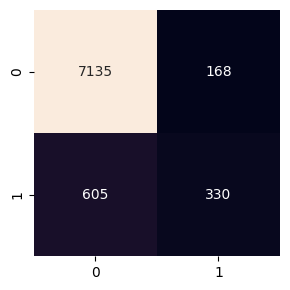

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

titanic_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()